In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd


In [13]:
cartel_df = pd.read_excel('./centrality_data/cartel_centralities.xlsx' )

distinct_cartel_df = cartel_df.drop_duplicates(subset=["Case:"])

distinct_cartel_df = distinct_cartel_df.drop(columns=["Company Name", "Company Degree Centrality", "Company Betweenness Centrality", "Company Closeness Centrality", "Company Eigenvector Centrality", "Company PageRank",	"Company Harmonic Centrality", "Company Degrees"])

target = distinct_cartel_df["Duration"]

distinct_cartel_df.head()


,Unnamed: 0,Case:,Cartel:,Entity Name,Key Iustin:,Year2010,Firm Name Mentioned in Commission Decision,Thomson (Rogier):,Key (invented by Iustin),Start-5,...,Annulled,Reason,Cartel Name,Cartel Degree Centrality,Cartel Betweenness Centrality,Cartel Closeness Centrality,Cartel Eigenvector Centrality,Cartel PageRank,Cartel Harmonic Centrality,Cartel Degrees
0,0,31865,PVC (II),Elf Aquitaine SA,C000007728,2010,Elf Aquitaine SA,Elf Aquitaine SA,31865C000007728,1976,...,0.0,0,PVC (II),0.019802,0.035391,0.080578,1.408994e-04,0.007593,30.213095,6
6,6,31906,FLAT GLASS,PPG Industries Inc,C000003476,2010,Vernante Pennitalia SpA,PPG Industries Inc,31906C000003476,1977,...,1.0,Duration,FLAT GLASS,0.016502,0.000229,0.016973,7.140057e-13,0.006984,5.500000,5
8,8,32800,Quantel International - continuum / Quantel SA,Hoya Corporation,C000087990,2010,Quantel International,Hoya Corporation,32800C000087990,1981,...,0.0,Duration,Quantel International - continuum / Quantel SA,0.003300,0.000000,0.003300,4.317360e-37,0.003289,1.000000,1
9,9,33016,ANSAC,FMC Corp.,C000001711,2010,FMC Wyoming Corporation,FMC Corp.,33016C000001711,1979,...,0.0,0,ANSAC,0.013201,0.004002,0.056937,7.167807e-05,0.005473,21.963492,4
13,13,33126,Ciment Cement,Vicat SA,C000007163,2010,Vicat SA,Vicat SA,33126C000007163,1978,...,0.0,0,Ciment Cement,0.029703,0.001137,0.028524,3.739372e-09,0.014910,9.833333,9


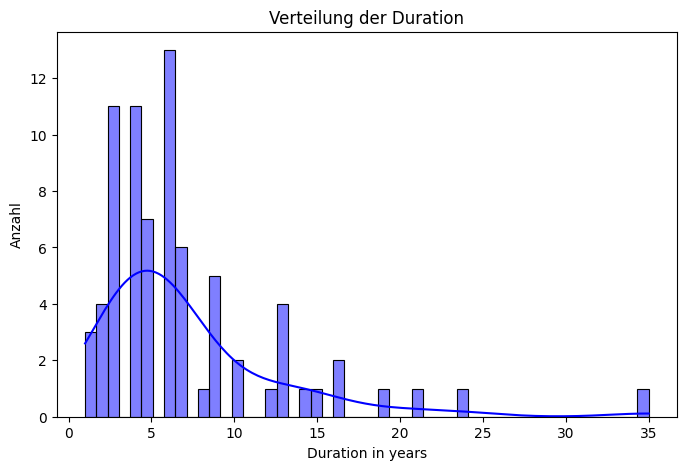

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(target, bins=50, kde=True, color="blue")
plt.xlabel("Duration in years")
plt.ylabel("Anzahl")
plt.title("Verteilung der Duration")
plt.show()

In [ ]:
features = cartel_df.drop(columns=["Duration"])

target = cartel_df["Duration"]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [ ]:
target_predictions = model.predict(features_test)

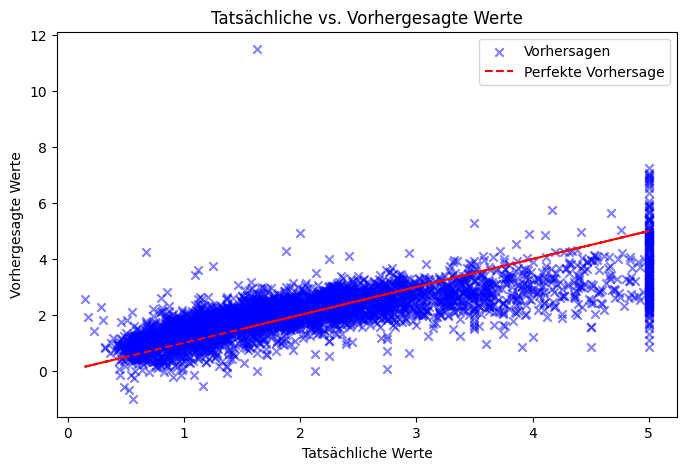

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(target_test, target_predictions, marker='x', alpha=0.5, color="blue", label="Vorhersagen")
plt.plot(target_test, target_test, color="red", linestyle="--", label="Perfekte Vorhersage")
plt.xlabel("Tatsächliche Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Tatsächliche vs. Vorhergesagte Werte")
plt.legend()
plt.show()

In [51]:
r2 = r2_score(target_test, target_predictions)
mae = mean_absolute_error(target_test, target_predictions)
mse = mean_squared_error(target_test, target_predictions)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error (MSE): {mse}")

feature_importance = pd.DataFrame({
    "Feature": features.columns,
    "Koeffizient": model.coef_
}).sort_values(by="Koeffizient", ascending=False)

print(feature_importance)

R² Score: 0.5757877060324511
Mean Absolute Error: 0.533200130495656
Mean Squared Error (MSE): 0.555891598695244
      Feature  Koeffizient
3   AveBedrms     0.783145
0      MedInc     0.448675
1    HouseAge     0.009724
4  Population    -0.000002
5    AveOccup    -0.003526
2    AveRooms    -0.123323
6    Latitude    -0.419792
7   Longitude    -0.433708
